# 03 — Exploratory Data Analysis / Análisis Exploratorio de Datos

**EN:** This notebook performs an initial exploration of the processed stamina dataset
(`stamina_dataset.csv`) to understand the distribution of difficulty labels, identify
highly correlated features, and spot visual patterns between individual features and
the target variable. The insights gathered here will guide feature selection before
model training.

**ES:** Este notebook realiza una exploración inicial del dataset de stamina procesado
(`stamina_dataset.csv`) para entender la distribución de los niveles de dificultad,
identificar características altamente correlacionadas y detectar patrones visuales
entre características individuales y la variable objetivo. Los hallazgos aquí guiarán
la selección de características antes del entrenamiento del modelo.

## 0. Setup / Configuración

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from __future__ import annotations

%pip install seaborn

import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# ES: Configurar rutas del proyecto para que src/ sea importable.
# EN: Configure project paths so that src/ is importable.
NOTEBOOK_DIR = Path.cwd()
PROJECT_ROOT = NOTEBOOK_DIR.parent if NOTEBOOK_DIR.name == "notebooks" else NOTEBOOK_DIR
SRC_PATH = PROJECT_ROOT / "src"
if str(SRC_PATH) not in sys.path:
    sys.path.insert(0, str(SRC_PATH))

# ES: Ruta al dataset procesado generado por build_dataset.py.
# EN: Path to the processed dataset generated by build_dataset.py.
PROCESSED_DATA_PATH: Path = PROJECT_ROOT / "data" / "processed" / "stamina_dataset.csv"

print(f"PROJECT_ROOT : {PROJECT_ROOT}")
print(f"PROCESSED_DATA_PATH : {PROCESSED_DATA_PATH}")
print(f"File exists : {PROCESSED_DATA_PATH.exists()}")

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
PROJECT_ROOT : /home/maru/Documents/Tesina/ITGStamina-rater-ml/ml-core
PROCESSED_DATA_PATH : /home/maru/Documents/Tesina/ITGStamina-rater-ml/ml-core/data/processed/stamina_dataset.csv
File exists : True


## 1. Load Data / Carga de Datos

**EN:** Read the processed CSV and perform a quick sanity check: shape, column dtypes, and missing value counts.

**ES:** Leer el CSV procesado y realizar una verificación rápida: dimensiones, tipos de columnas y conteo de valores faltantes.

In [3]:
# ES: Cargar el dataset procesado en un DataFrame de Pandas.
# EN: Load the processed dataset into a Pandas DataFrame.
df = pd.read_csv(PROCESSED_DATA_PATH)

print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
display(df.head())
df.info()

Shape: 2852 rows × 11 columns



,chart_id,difficulty,breakdown,source_file,display_bpm,ebpm,total_stream_length,max_stream_length,break_count,stream_break_ratio,average_nps
0,b42b89a8,11,7 (9) 7 (19) 7 7 (9) 7,Stamina RPG 5/[11] Big Money (Medium)/The Quic...,140.0,140.0,35,7,3,0.946,5.79
1,1e857ceb,11,1 (2) 2 (2) 2 (2) 2 (2) 2 (2) 2 (2) 2 (2) 2 (2...,Stamina RPG 5/[11] Burn Up (Hard)/burn up.sm,149.0,149.0,34,2,17,0.540,5.49
2,4209cad6,11,24 (8) 24,Stamina RPG 5/[11] Creed/Creed.sm,120.0,120.0,48,24,1,6.000,6.27
3,e55d6257,11,6 (10) 6 (2) 7 (34) 15 (7) 1,Stamina RPG 5/[11] Everytime we Touch/Everytim...,142.0,142.0,35,15,4,0.660,5.57
4,060ec29a,11,1 16 (16) 1 16 (16) 17,Stamina RPG 5/[11] Feel Special/Feel Special.sm,129.0,129.0,51,17,2,1.594,5.74


<class 'pandas.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   chart_id             2852 non-null   str    
 1   difficulty           2852 non-null   int64  
 2   breakdown            2852 non-null   str    
 3   source_file          2852 non-null   str    
 4   display_bpm          2852 non-null   float64
 5   ebpm                 2852 non-null   float64
 6   total_stream_length  2852 non-null   int64  
 7   max_stream_length    2852 non-null   int64  
 8   break_count          2852 non-null   int64  
 9   stream_break_ratio   2852 non-null   float64
 10  average_nps          2852 non-null   float64
dtypes: float64(4), int64(4), str(3)
memory usage: 245.2 KB


## 2. Target Distribution / Distribución del Target

**EN:** Before training any model it is critical to check whether the target classes are balanced. A heavily skewed distribution (e.g. many level-15 charts but very few level-25 charts) can mislead accuracy metrics and bias the model towards the majority class.

**ES:** Antes de entrenar cualquier modelo es fundamental verificar si las clases objetivo están balanceadas. Una distribución muy sesgada (p.ej. muchos charts de nivel 15 pero muy pocos de nivel 25) puede distorsionar las métricas de exactitud y sesgar el modelo hacia la clase mayoritaria.

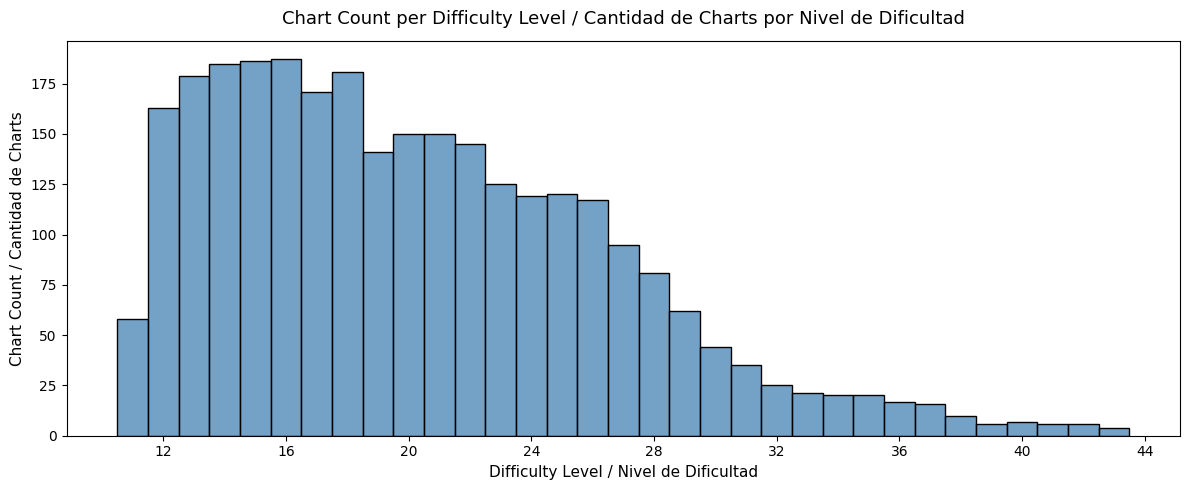

In [4]:
# ES: Histograma de la columna 'difficulty' (variable objetivo).
#     Cada barra representa cuántos charts existen para cada nivel de dificultad.
#     discrete=True asegura una barra por valor entero sin interpolación.
# EN: Histogram of the 'difficulty' column (target variable).
#     Each bar represents how many charts exist at each difficulty level.
#     discrete=True ensures one bar per integer value with no interpolation.

fig, ax = plt.subplots(figsize=(12, 5))

sns.histplot(
    data=df,
    x="difficulty",
    discrete=True,
    kde=False,
    color="steelblue",
    ax=ax,
)

ax.set_title(
    "Chart Count per Difficulty Level / Cantidad de Charts por Nivel de Dificultad",
    fontsize=13,
    pad=12,
)
ax.set_xlabel("Difficulty Level / Nivel de Dificultad", fontsize=11)
ax.set_ylabel("Chart Count / Cantidad de Charts", fontsize=11)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

## 3. Correlation Matrix / Matriz de Correlación

**EN:** The Pearson correlation matrix measures the linear relationship between every pair of numeric columns. Values close to **+1** indicate a strong positive relationship; values close to **-1** indicate a strong inverse relationship. The column `difficulty` is our target — features with a high absolute correlation to it are the most informative predictors and should be prioritised during feature selection.

**ES:** La matriz de correlación de Pearson mide la relación lineal entre cada par de columnas numéricas. Valores cercanos a **+1** indican una relación positiva fuerte; valores cercanos a **-1** indican una relación inversa fuerte. La columna `difficulty` es nuestro objetivo — las características con alta correlación absoluta con ella son los predictores más informativos y deben priorizarse durante la selección de características.

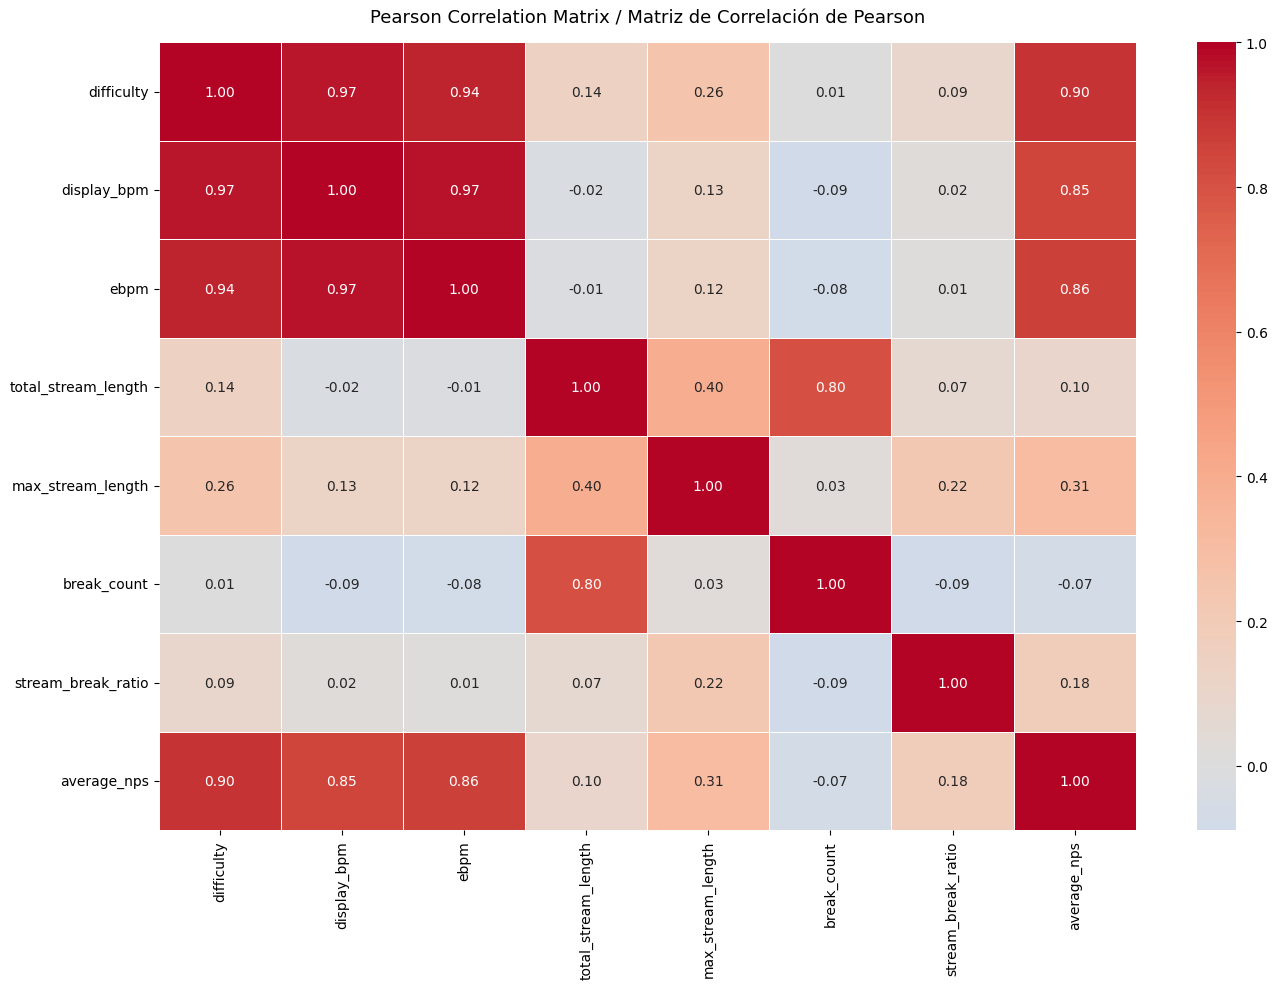


Correlations with 'difficulty' (sorted by |r|):
display_bpm            0.965287
ebpm                   0.942464
average_nps            0.901642
max_stream_length      0.255766
total_stream_length    0.143806
stream_break_ratio     0.088989
break_count            0.006599


In [5]:
# ES: Calcular la matriz de correlación de Pearson sobre columnas numéricas.
#     numeric_only=True excluye columnas de texto como 'source_file'.
# EN: Compute the Pearson correlation matrix over numeric columns only.
#     numeric_only=True excludes text columns such as 'source_file'.
corr = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(14, 10))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    ax=ax,
)

ax.set_title(
    "Pearson Correlation Matrix / Matriz de Correlación de Pearson",
    fontsize=13,
    pad=14,
)

plt.tight_layout()
plt.show()

# ES: Mostrar correlaciones con 'difficulty' ordenadas de mayor a menor valor absoluto.
# EN: Show correlations with 'difficulty' sorted by absolute value (descending).
print("\nCorrelations with 'difficulty' (sorted by |r|):")
print(corr["difficulty"].drop("difficulty").abs().sort_values(ascending=False).to_string())

## 4. Feature vs Target Scatter Plots / Gráficos de Dispersión Feature vs Objetivo

**EN:** Scatter plots reveal whether the relationship between a single feature and the target is monotonic, clustered, or noisy. `total_stream_length` captures the total volume of streaming content; `peak_ebpm` captures the effective BPM of the hardest burst section. Both are expected to increase with difficulty.

**ES:** Los gráficos de dispersión revelan si la relación entre una característica individual y el objetivo es monótona, agrupada o ruidosa. `total_stream_length` captura el volumen total de contenido en stream; `peak_ebpm` captura el BPM efectivo del burst más intenso. Se espera que ambos aumenten con la dificultad.

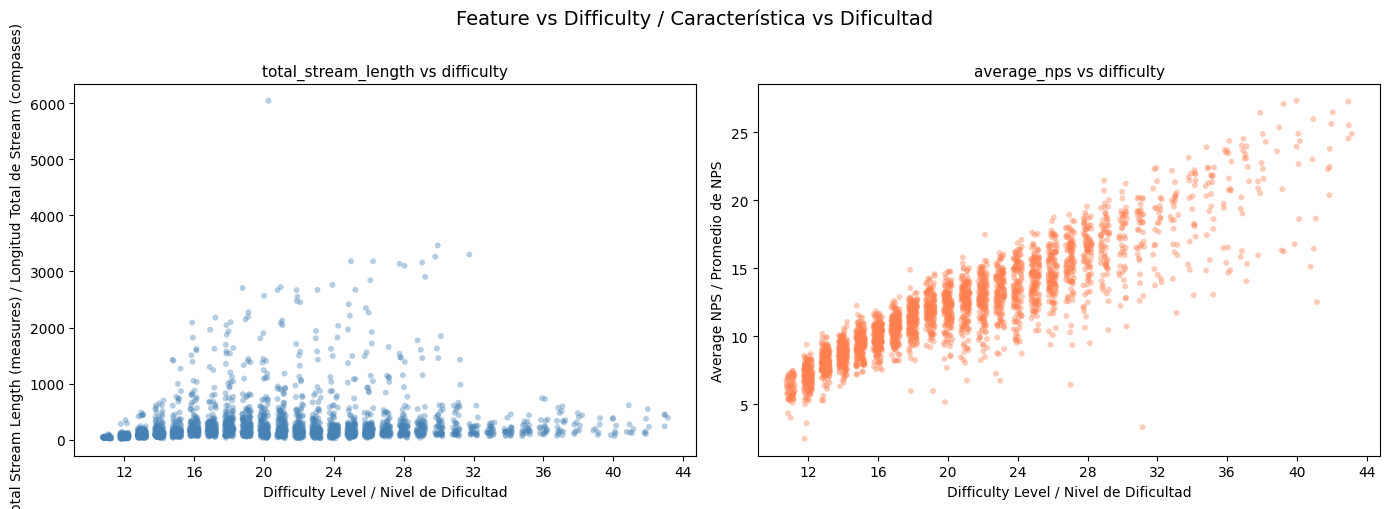

In [6]:
# ES: Añadir jitter horizontal a 'difficulty' para evitar superposición de puntos.
#     Los niveles de dificultad son enteros, por lo que sin jitter los puntos se
#     apilan en columnas verticales perfectas.
# EN: Add horizontal jitter to 'difficulty' to avoid point overlap.
#     Difficulty levels are integers, so without jitter points stack in perfect
#     vertical columns.
rng = np.random.default_rng(seed=42)
jitter = rng.uniform(-0.25, 0.25, size=len(df))
difficulty_jittered = df["difficulty"] + jitter

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(
    "Feature vs Difficulty / Característica vs Dificultad",
    fontsize=14,
    y=1.01,
)

# ── Left plot: total_stream_length ──────────────────────────────────────────
# ES: Longitud total de stream vs dificultad.
# EN: Total stream length vs difficulty.
axes[0].scatter(
    difficulty_jittered,
    df["total_stream_length"],
    alpha=0.4,
    s=18,
    color="steelblue",
    edgecolors="none",
)
axes[0].set_xlabel("Difficulty Level / Nivel de Dificultad", fontsize=10)
axes[0].set_ylabel("Total Stream Length (measures) / Longitud Total de Stream (compases)", fontsize=10)
axes[0].set_title("total_stream_length vs difficulty", fontsize=11)
axes[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# ── Right plot: average_nps ──────────────────────────────────────────────────
# ES: Promedio de NPS vs dificultad.
# EN: Average NPS vs difficulty.
axes[1].scatter(
    difficulty_jittered,
    df["average_nps"],
    alpha=0.4,
    s=18,
    color="coral",
    edgecolors="none",
)
axes[1].set_xlabel("Difficulty Level / Nivel de Dificultad", fontsize=10)
axes[1].set_ylabel("Average NPS / Promedio de NPS", fontsize=10)
axes[1].set_title("average_nps vs difficulty", fontsize=11)
axes[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


## 5. Feature–Target Correlation Ranking / Ranking de Correlación Feature–Objetivo

**EN:** Pearson measures linear association; Spearman measures monotonic (rank-order) association, which is more robust for ordinal targets like difficulty levels. Comparing both highlights whether relationships are linear or merely monotonic.

**ES:** Pearson mide asociación lineal; Spearman mide asociación monótona (por rangos), más robusta para objetivos ordinales como los niveles de dificultad. Comparar ambas resalta si las relaciones son lineales o simplemente monótonas.


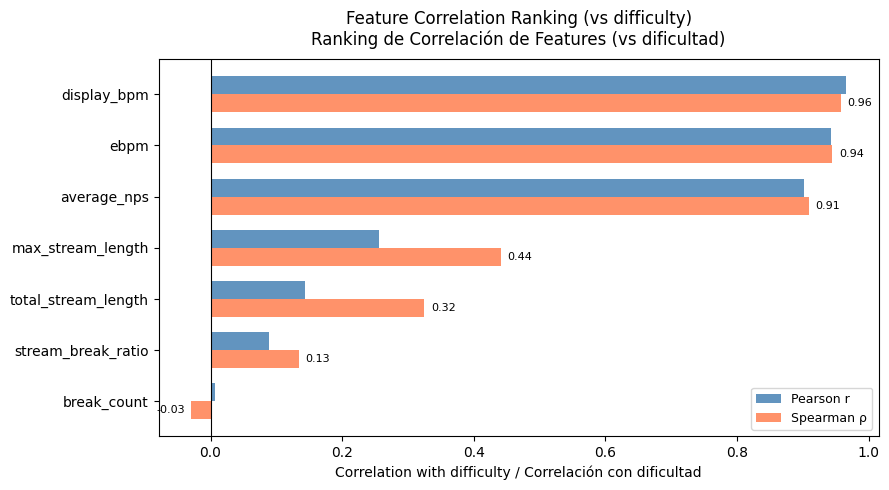


Correlation table / Tabla de correlaciones:
                     Pearson r  Spearman ρ
display_bpm           0.965287    0.957863
ebpm                  0.942464    0.944883
average_nps           0.901642    0.908694
max_stream_length     0.255766    0.440597
total_stream_length   0.143806    0.324835
stream_break_ratio    0.088989    0.134684
break_count           0.006599   -0.028989


In [7]:
# ES: Columnas numéricas de features (excluir target, hash y ruta de archivo).
# EN: Numeric feature columns (exclude target, hash, and file path).
EXCLUDE_COLS = {"difficulty", "chart_id", "source_file", "breakdown"}
feature_cols = [c for c in df.select_dtypes(include="number").columns if c not in EXCLUDE_COLS]

# ES: Calcular correlaciones de Pearson y Spearman con la variable objetivo.
# EN: Compute Pearson and Spearman correlations with the target variable.
pearson = df[feature_cols + ["difficulty"]].corr(method="pearson")["difficulty"].drop("difficulty")
spearman = df[feature_cols + ["difficulty"]].corr(method="spearman")["difficulty"].drop("difficulty")

corr_df = pd.DataFrame({
    "Pearson r": pearson,
    "Spearman ρ": spearman,
}).sort_values("Spearman ρ", key=abs, ascending=True)

# ES: Gráfico de barras horizontales con ambas correlaciones, ordenadas por |Spearman|.
# EN: Horizontal bar chart with both correlations, sorted by |Spearman|.
fig, ax = plt.subplots(figsize=(9, 5))

y_pos = np.arange(len(corr_df))
bar_h = 0.35

bars_p = ax.barh(y_pos + bar_h / 2, corr_df["Pearson r"], bar_h,
                 label="Pearson r", color="steelblue", alpha=0.85)
bars_s = ax.barh(y_pos - bar_h / 2, corr_df["Spearman ρ"], bar_h,
                 label="Spearman ρ", color="coral", alpha=0.85)

ax.set_yticks(y_pos)
ax.set_yticklabels(corr_df.index, fontsize=10)
ax.axvline(0, color="black", linewidth=0.8)
ax.set_xlabel("Correlation with difficulty / Correlación con dificultad", fontsize=10)
ax.set_title(
    "Feature Correlation Ranking (vs difficulty)\nRanking de Correlación de Features (vs dificultad)",
    fontsize=12, pad=10,
)
ax.legend(fontsize=9)

# ES: Anotar el valor de Spearman en cada barra para lectura rápida.
# EN: Annotate each bar with the Spearman value for quick reading.
for bar in bars_s:
    w = bar.get_width()
    ax.text(
        w + (0.01 if w >= 0 else -0.01), bar.get_y() + bar.get_height() / 2,
        f"{w:.2f}", va="center", ha="left" if w >= 0 else "right", fontsize=8,
    )

plt.tight_layout()
plt.show()

print("\nCorrelation table / Tabla de correlaciones:")
print(corr_df.sort_values("Spearman ρ", key=abs, ascending=False).to_string())


## 6. Top Features vs Difficulty — Violin Plots

**EN:** Violin plots show the full distribution of a feature at each difficulty level, not just the mean. Wide shapes indicate high variance within a level; narrow shapes indicate consistency. The top 4 features by |Spearman ρ| are plotted automatically.

**ES:** Los violin plots muestran la distribución completa de una feature en cada nivel de dificultad, no solo la media. Formas anchas indican alta varianza dentro del nivel; formas estrechas indican consistencia. Se grafican automáticamente las 4 features con mayor |Spearman ρ|.


Top 4 features by |Spearman ρ|: ['display_bpm', 'ebpm', 'average_nps', 'max_stream_length']


/tmp/ipykernel_1064349/1393000285.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_1064349/1393000285.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_1064349/1393000285.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_1064349/1393000285.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


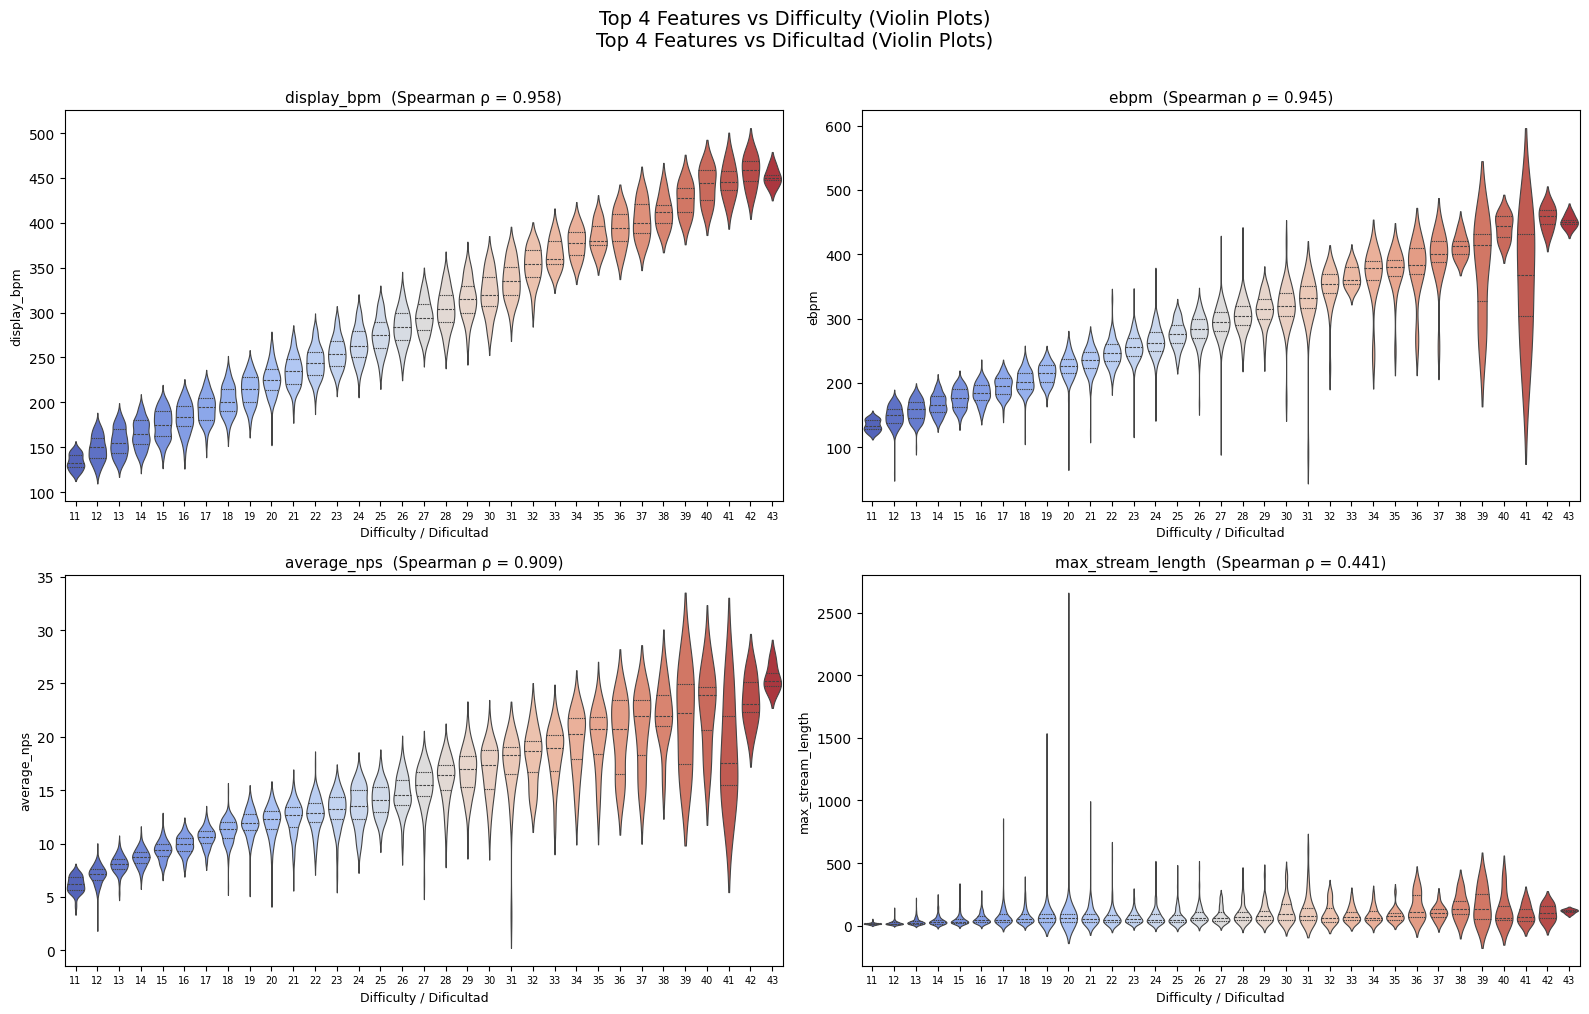

In [8]:
# ES: Seleccionar las 4 features con mayor correlación absoluta de Spearman.
# EN: Select top 4 features by absolute Spearman correlation.
top_features = (
    corr_df["Spearman ρ"].abs()
    .sort_values(ascending=False)
    .head(4)
    .index.tolist()
)
print("Top 4 features by |Spearman ρ|:", top_features)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle(
    "Top 4 Features vs Difficulty (Violin Plots)\nTop 4 Features vs Dificultad (Violin Plots)",
    fontsize=14, y=1.01,
)

palette = sns.color_palette("coolwarm", n_colors=df["difficulty"].nunique())

for ax, feat in zip(axes.flat, top_features):
    # ES: Violin plot con puntos de mediana superpuestos.
    # EN: Violin plot with overlaid median dots.
    sns.violinplot(
        data=df,
        x="difficulty",
        y=feat,
        palette=palette,
        inner="quartile",   # ES: líneas de cuartiles internas / EN: inner quartile lines
        linewidth=0.8,
        ax=ax,
    )
    rho = corr_df.loc[feat, "Spearman ρ"]
    ax.set_title(f"{feat}  (Spearman ρ = {rho:.3f})", fontsize=11)
    ax.set_xlabel("Difficulty / Dificultad", fontsize=9)
    ax.set_ylabel(feat, fontsize=9)
    ax.tick_params(axis="x", labelsize=7)

plt.tight_layout()
plt.show()
